In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/Users/harshitgupta/Desktop/vs /VS-Data-Den/model_training/regional_master_50000009.csv',index_col='YEARWEEK',parse_dates=True)
# df.index.freq='MS'

In [3]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


In [4]:
# df['YEARWEEK'] = df['YEARWEEK'].astype(str)
# df['YEARWEEK'] = pd.to_datetime(df['YEARWEEK'].astype(str) + '-0', format='%Y%W-%w')

In [5]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


In [6]:
# df.set_index('YEARWEEK' , inplace=True)

In [7]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


In [8]:
df.describe()

,TOTAL_SALES
count,3.250000e+02
mean,1.325707e+06
std,1.008065e+06
min,6.398100e+04
25%,8.053840e+05
50%,1.005241e+06
75%,1.501793e+06
max,7.838964e+06


In [9]:
df.count()

TOTAL_SALES    325
dtype: int64

<Axes: xlabel='YEARWEEK'>

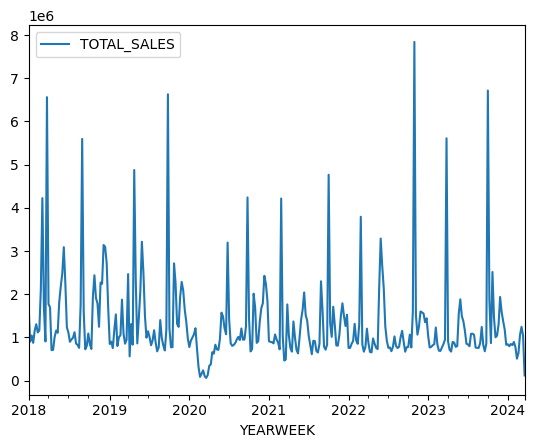

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result = adfuller(df['TOTAL_SALES'])

In [13]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test stat',  'p-value' , 'no of lags used' , 'no of obs']
    for value,label in zip(result,labels):
        print(label+' : ' + str(value))
    if result[1]<=0.05:
        print('strong evidence against null hypothesis')
    else:
        print('weak evidenece against null hypothesis')

In [14]:
adfuller_test(df['TOTAL_SALES'])

ADF test stat : -14.42914691449927
p-value : 7.682256216128759e-27
no of lags used : 0
no of obs : 324
strong evidence against null hypothesis


In [15]:
import statsmodels.api as sm

In [16]:
train = df.iloc[:int(0.6*len(df))]
test = df.iloc[int(0.6*len(df)):]


In [17]:
train.count() , test.count()

(TOTAL_SALES    195
 dtype: int64,
 TOTAL_SALES    130
 dtype: int64)

In [43]:
model = sm.tsa.statespace.SARIMAX(train['TOTAL_SALES'], order=(1,0,1), seasonal_order=(1,1,1,52))
results = model.fit()

#ORIGINAL




/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12723D+01    |proj g|=  4.59361D-01

At iterate    5    f=  1.11429D+01    |proj g|=  2.77072D-02

At iterate   10    f=  1.11401D+01    |proj g|=  1.94481D-03

At iterate   15    f=  1.11400D+01    |proj g|=  1.06284D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   8.546D-06   1.114D+01
  F =   11.139990935398540     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [42]:
forecast = results.forecast(steps=len(test))

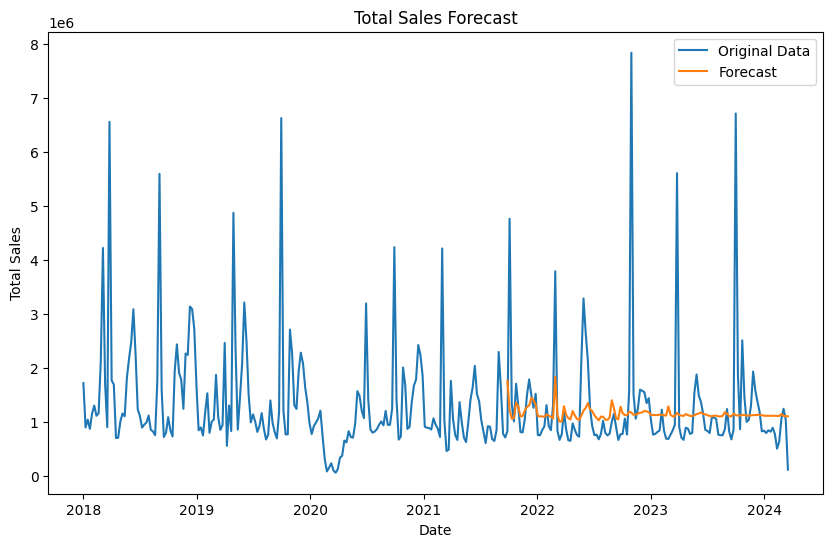

Forecasted Sales:
2021-09-27    1.766870e+06
2021-10-04    1.230978e+06
2021-10-11    1.064063e+06
2021-10-18    1.076321e+06
2021-10-25    1.359491e+06
                  ...     
2024-02-19    1.113561e+06
2024-02-26    1.151100e+06
2024-03-04    1.115930e+06
2024-03-11    1.109244e+06
2024-03-18    1.109015e+06
Freq: W-MON, Name: predicted_mean, Length: 130, dtype: float64


In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TOTAL_SALES'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Total Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


print("Forecasted Sales:")
print(forecast)

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error


In [39]:
rmse = np.sqrt(mean_squared_error(test['TOTAL_SALES'], forecast))

In [40]:
rmse

1086430.8558234354

In [24]:
test.head(10)

,TOTAL_SALES
YEARWEEK,
2021-09-27,835136
2021-10-04,4765110
2021-10-11,1326006
2021-10-18,1013609
2021-10-25,1711620
2021-11-01,1294929
2021-11-08,817435
2021-11-15,809694
2021-11-22,1054434


In [25]:
test['prediction'] = results.predict(dynamic=True)

/var/folders/_p/ljb0l43112vc95swz8nhgv340000gn/T/ipykernel_55017/2851741147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = results.predict(dynamic=True)


In [26]:
test.head(10)

,TOTAL_SALES,prediction
YEARWEEK,,
2021-09-27,835136,NaN
2021-10-04,4765110,NaN
2021-10-11,1326006,NaN
2021-10-18,1013609,NaN
2021-10-25,1711620,NaN
2021-11-01,1294929,NaN
2021-11-08,817435,NaN
2021-11-15,809694,NaN
2021-11-22,1054434,NaN


In [27]:
df[['TOTAL_SALES' , 'prediction']].plot(figsize=(12,8))

KeyError: "['prediction'] not in index"

In [ ]:
df.tail()

,SALES,prediction
YEARWEEK,,
2024-02-18,11044773.69,NaN
2024-02-25,12756401.06,NaN
2024-03-03,11992878.95,NaN
2024-03-10,7420313.89,NaN
2024-03-17,1776069.92,NaN
